In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
%matplotlib inline

In [2]:
file = '/users/jun/python/alphago/fifth_game.csv'

In [3]:
data = pd.read_csv(file)
data.columns = ['turn_index', 'Lee_Sedol','AlphaGo', 'Lee_Sedol_ott','AlphaGo_ott']

In [4]:
data.index = data.turn_index

In [5]:
df_alpha = data.AlphaGo.dropna().reset_index()
df_lee = data.Lee_Sedol.dropna().reset_index()

In [6]:
def time_func(x):
    k = x.split(":")
    hour = int(k[0])
    minute = int(k[1])
    second = int(k[2])
    ts = hour * 3600 + minute * 60 + second
    return ts
        
df_alpha['AlphaGo_ts'] = df_alpha.AlphaGo.apply(lambda x: time_func(x))
df_lee['Lee_Sedol_ts'] = df_lee.Lee_Sedol.apply(lambda x: time_func(x))

In [7]:
df_lee.head(10)

,turn_index,Lee_Sedol,Lee_Sedol_ts
0,0,02:00:00,7200
1,1,01:59:35,7175
2,2,01:58:29,7109
3,3,01:58:16,7096
4,4,01:58:01,7081
5,5,01:57:59,7079
6,6,01:57:07,7027
7,7,01:56:24,6984
8,8,01:56:21,6981
9,9,01:52:16,6736


In [8]:
df_lee['Lee_Sedol_lag'] = df_lee.Lee_Sedol_ts.shift(1)
df_alpha['AlphaGo_lag'] = df_alpha.AlphaGo_ts.shift(1)

In [9]:
df_lee['Lee_Sedol_tt'] = df_lee.Lee_Sedol_lag - df_lee.Lee_Sedol_ts
df_alpha['AlphaGo_tt'] = df_alpha.AlphaGo_lag - df_alpha.AlphaGo_ts

In [10]:
df_lee_result = df_lee[['turn_index','Lee_Sedol_tt']][1:]
df_alpha_result = df_alpha[['turn_index','AlphaGo_tt']][1:]

In [11]:
df_alpha_result.head()

,turn_index,AlphaGo_tt
1,1,85
2,2,68
3,3,53
4,4,62
5,5,73


In [12]:
df_lee_ott = data.Lee_Sedol_ott.dropna().reset_index()
df_lee_ott['Lee_Sedol_tt'] = df_lee_ott.Lee_Sedol_ott.apply(lambda x: time_func(x))
df_lee_ott_result = df_lee_ott[['turn_index', 'Lee_Sedol_tt']]

In [13]:
df_alpha_ott = data.AlphaGo_ott.dropna().reset_index()
df_alpha_ott['AlphaGo_tt'] = df_alpha_ott.AlphaGo_ott.apply(lambda x: time_func(x))
df_alpha_ott_result = df_alpha_ott[['turn_index', 'AlphaGo_tt']]

In [14]:
df_alpha_final = df_alpha_result.append(df_alpha_ott_result).reset_index(drop=True)
df_lee_final = df_lee_result.append(df_lee_ott_result).reset_index(drop=True)

In [15]:
result_df = df_alpha_final.merge(df_lee_final, on='turn_index')

In [16]:
result_df.columns = ['turn_index', 'AlphaGo_WHITE', 'Lee_Sedol_BLACK']

In [17]:
result_df_2 = pd.melt(result_df,id_vars=['turn_index']) 

In [18]:
result_df_2.columns = ['turn_index', 'player', 'thinking_time']
result_df_2.head()

,turn_index,player,thinking_time
0,1,AlphaGo_WHITE,85
1,2,AlphaGo_WHITE,68
2,3,AlphaGo_WHITE,53
3,4,AlphaGo_WHITE,62
4,5,AlphaGo_WHITE,73


In [23]:
result_df.index = result_df.turn_index

In [24]:
r_df = result_df[['AlphaGo_WHITE', 'Lee_Sedol_BLACK']] / 60

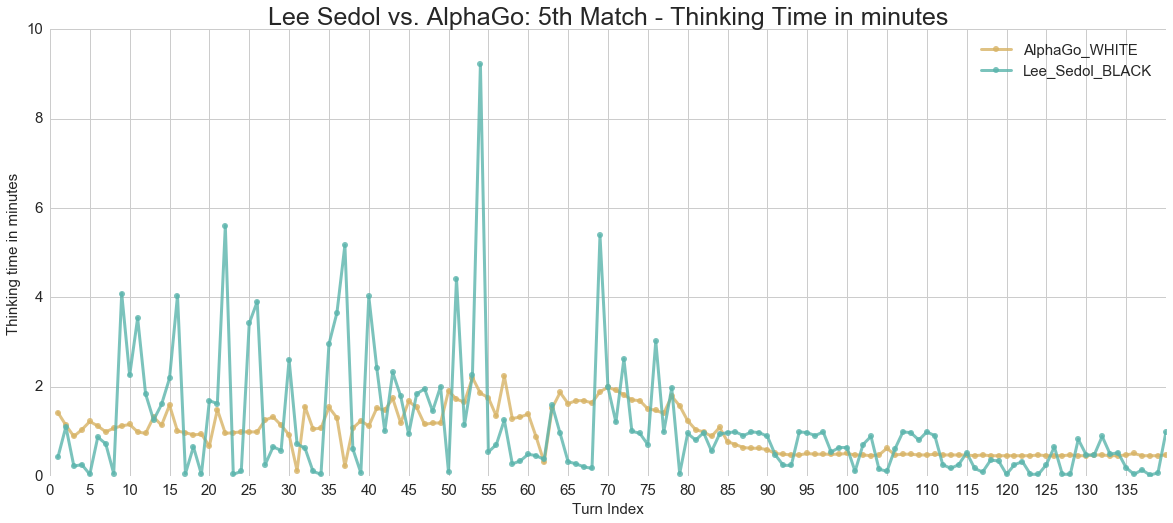

In [25]:
plt.figure(figsize=(20, 5))

fig = r_df.plot(color=['#d8b365', '#5ab4ac'], marker='o', markersize=6, alpha=0.8, linewidth=3, fontsize=15, figsize=(20, 8))
fig.set_axis_bgcolor('white') 
plt.xticks(np.arange(0, 140, 5))
plt.grid(b=True, which='major', color='0.8',linestyle='-')

plt.title('Lee Sedol vs. AlphaGo: 5th Match - Thinking Time in minutes', size=25)
plt.ylabel('Thinking time in minutes', size=15)
plt.xlabel('Turn Index', size=15)
plt.legend(prop={'size':15})

plt.show()